In [ ]:
import pandas as pd

df = pd.read_csv('likeness_scrape.csv')

In [ ]:
df

,restaurant_name,body
0,joes_shanghai,Joe's Shanghai holds a special place in my hea...
1,vanessas_dumpling_house,Vanessa's Dumpling House is a must-visit spot ...
2,nyonya,Food was delicious and staff were very attenti...
3,very_fresh_noodles,This spot is located in Chelsea Market. So wor...
4,tamarind,I'm so mad it took me so long to try this plac...
5,bengal_tiger,I have some stomach sensitivity to Indian food...
6,baar_baar,Wow. This was very good.\n\nMy friend and I we...
7,seva_indian_cuisine,Greeted nicely and sat quickly. Chairs were co...
8,los_tacos_no_1,Alright. The line was LONG. LONG! But my boyfr...
9,toloache_50,"Delicious, cozy, fun and good service. We enjo..."


In [ ]:
import re
import string

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')

from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import string

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [ ]:
df_copy = df.copy()

In [ ]:
def remove_punctuation(text):
    # Tokenize text into sentences
    sentences = nltk.sent_tokenize(text)
    # Initialize a translation table for removing punctuation
    translator = str.maketrans('', '', string.punctuation)
    # Remove punctuation from each sentence
    clean_sentences = []
    for sentence in sentences:
        # Tokenize each sentence into words
        words = nltk.word_tokenize(sentence)
        # Remove punctuation from words and join them back into a sentence
        clean_sentence = ' '.join(word.translate(translator) for word in words)
        clean_sentences.append(clean_sentence)
    # Join cleaned sentences into a single string
    cleaned_text = ' '.join(clean_sentences)
    return cleaned_text

# Apply the remove_punctuation function to the "body" column in the DataFrame
df_copy['body'] = df_copy['body'].apply(remove_punctuation)

In [ ]:
def tokenize_and_stem(text):
    # First tokenize by sentence, then by word to ensure that punctuation is caught as its own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # Filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=5000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(df_copy['body']) #fit the vectorizer to body

print(tfidf_matrix.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev'

(20, 5000)


In [ ]:
# Apply the tokenize and stem function to the "body" column in the DataFrame
df_copy['body'] = df_copy['body'].apply(lambda x: tokenize_and_stem(x))

In [ ]:
df_copy

,restaurant_name,body
0,joes_shanghai,"[joe, s, shanghai, hold, a, special, place, in..."
1,vanessas_dumpling_house,"[vanessa, s, dumpl, hous, is, a, mustvisit, sp..."
2,nyonya,"[food, was, delici, and, staff, were, veri, at..."
3,very_fresh_noodles,"[this, spot, is, locat, in, chelsea, market, s..."
4,tamarind,"[i, m, so, mad, it, took, me, so, long, to, tr..."
5,bengal_tiger,"[i, have, some, stomach, sensit, to, indian, f..."
6,baar_baar,"[wow, this, was, veri, good, my, friend, and, ..."
7,seva_indian_cuisine,"[greet, nice, and, sat, quick, chair, were, co..."
8,los_tacos_no_1,"[alright, the, line, was, long, long, but, my,..."
9,toloache_50,"[delici, cozi, fun, and, good, servic, we, enj..."


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

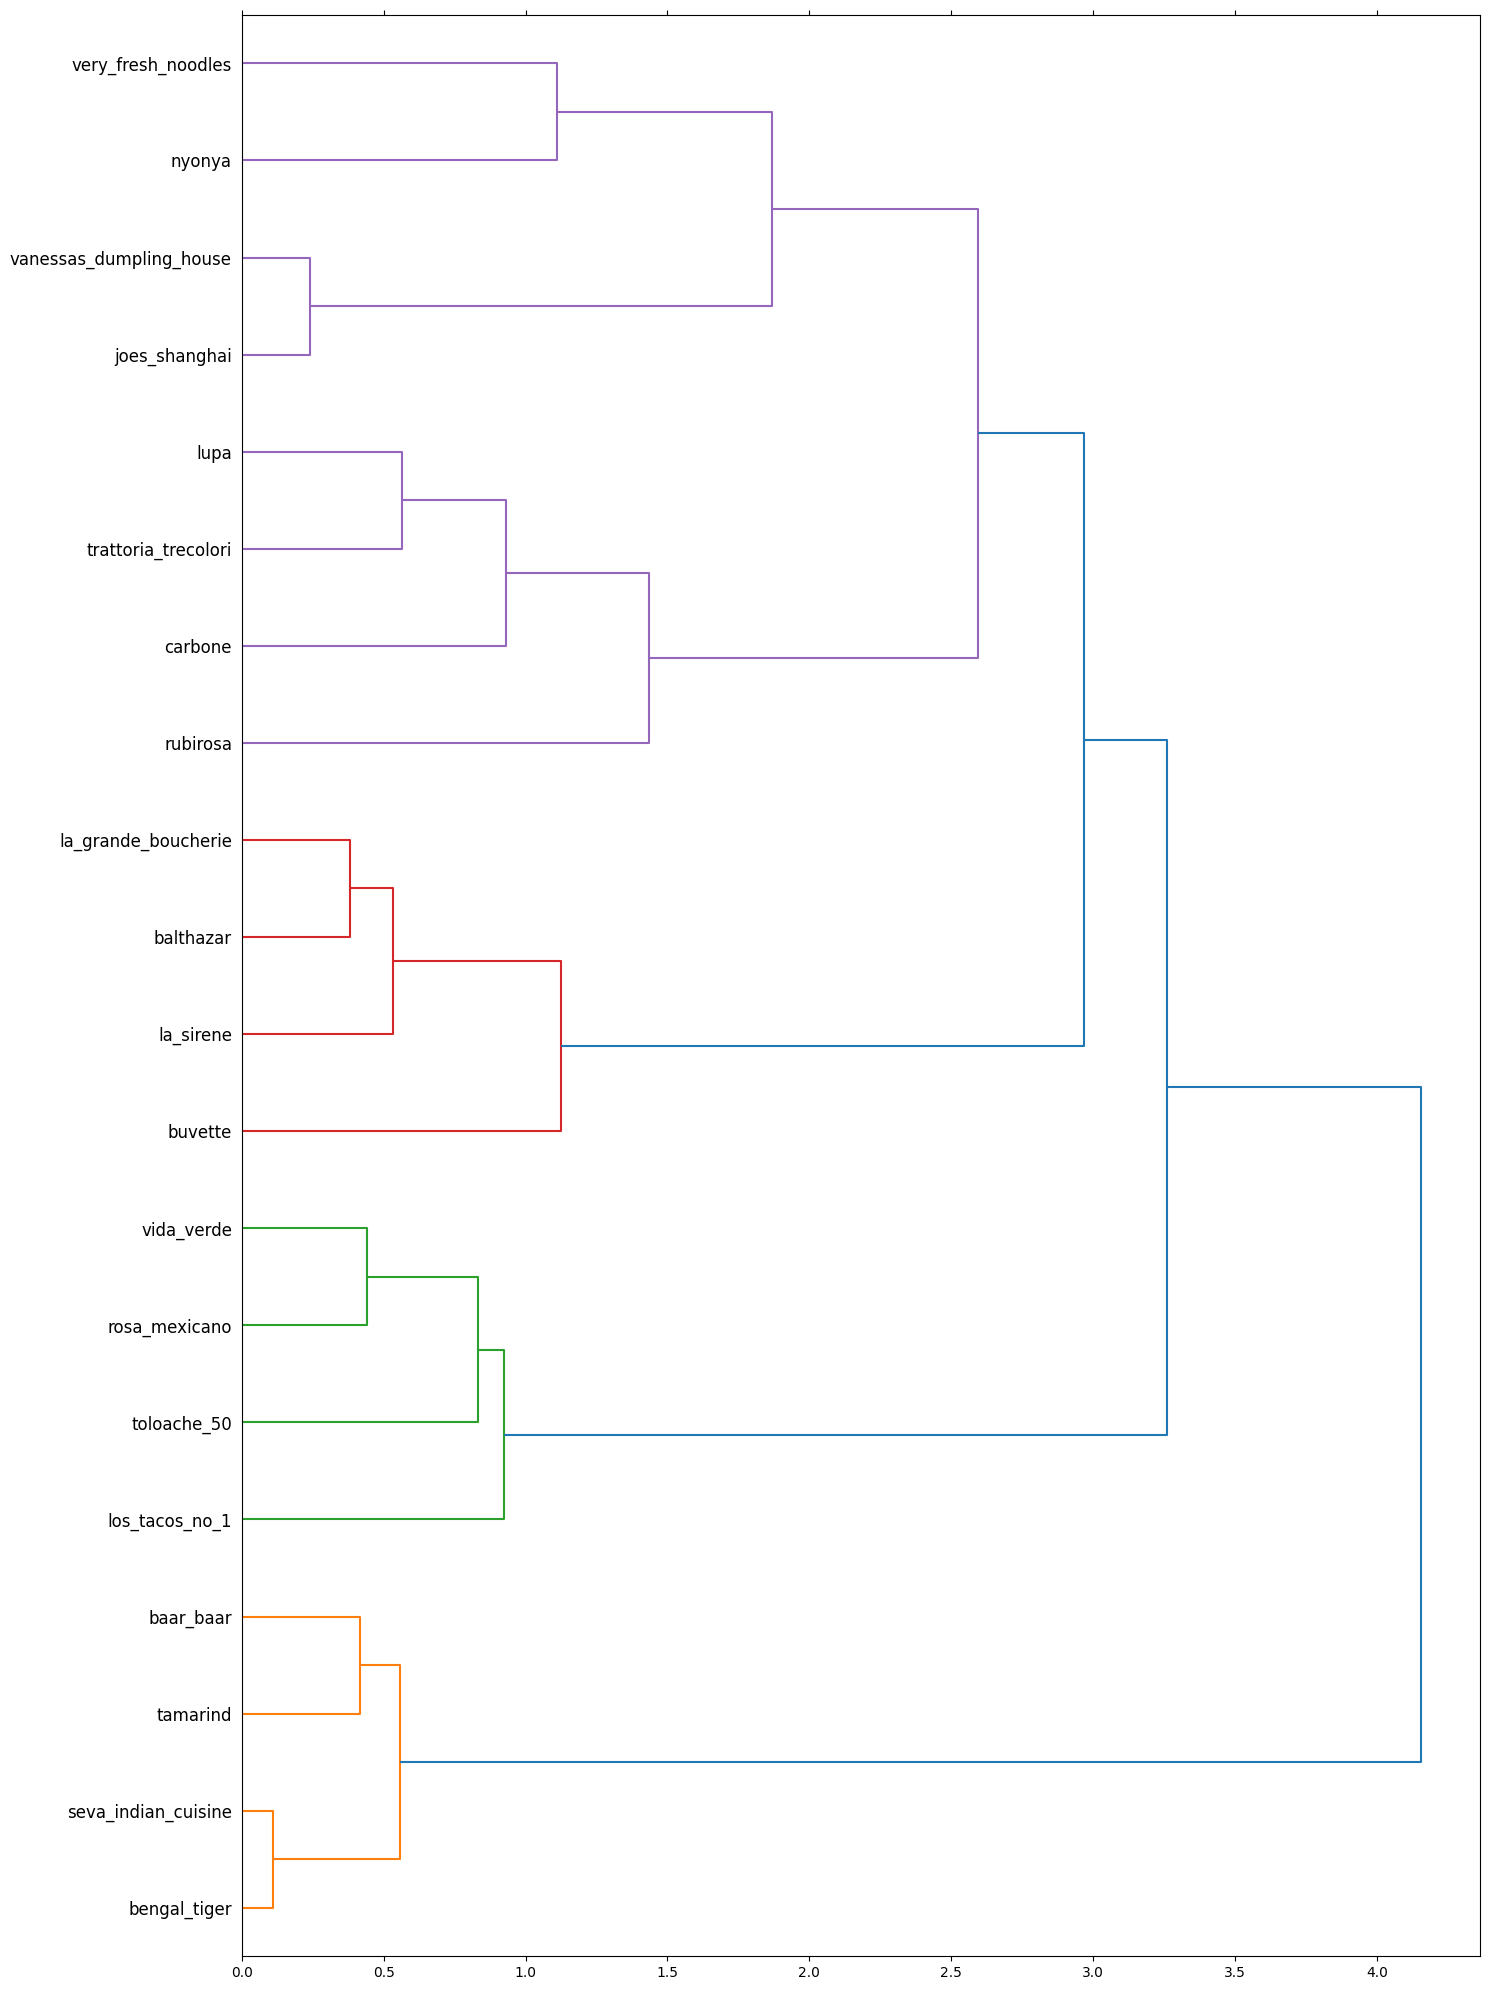

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels= df['restaurant_name'].tolist());

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In this example all of the restaurants that were of the same cuisine were the most similar according to the dendrogram. After that it shows that Italian and Chinese were the closest different cuisines. French then Mexican then Indian were then related to those in that order. I think the clustering makes some sense, it makes sense to me that French and Italian were close, and that Indian and Mexican were the least related to the rest, however im supprised that Chinese and Italian were so closely related.